<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AB-Testing" data-toc-modified-id="AB-Testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AB-Testing</a></span></li></ul></div>

# AB-Testing

![cats](images/cats.jpeg)


Imaginad que somos los cientificos de datos de la empresa de videojuegos Tactile Entertainment. Los desarrolladores del juego Cookie Cats pretenden introducir un cambio en el juego para aumentar la retencion de los jugadores. En cierto nivel del juego los jugadores se encuentran una puerta que les obliga a esperar o a pagar la app. Actualmente la puerta se encuentra en nivel 30 y se pretende pasar al nivel 40, para comprobar la retencion a 1 y 7 dias. Antes de realizar el cambio definitivo en el juego se raliza un test AB.

Los datos estan alojados en `data/cookie_cats.csv`. Nuestro grupo de control sera la version actual `gate_30` y el grupo de tratamiento sera la version `gate_40`. Debemos realizar el test para 1 dia de retencion `retention_1` y para 7 dias `retention_7`.

In [1]:
import pandas as pd

import numpy as np

from statsmodels.stats.proportion import proportions_ztest, proportion_confint

from scipy.stats import norm, sem

import statsmodels.stats.api as sms

import pylab as plt

import scipy.stats as stats

import seaborn as sns

In [2]:
game = pd.read_csv('data\cookie_cats.csv')

game.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## AB-Testing

In [3]:
len(game[game.version=='gate_30']), len(game[game.version=='gate_40'])

(44700, 45489)

In [4]:
control = game[game.version=='gate_30']

tratamiento = game[game.version=='gate_40']

ab_test = pd.concat([control, tratamiento], axis=0)

ab_test.reset_index(drop=True, inplace=True)

ab_test.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,1066,gate_30,0,False,False
3,2101,gate_30,0,False,False
4,2179,gate_30,39,True,False


In [5]:
# Ambos valores tienen que ser iguales

ab_test.version.value_counts()

gate_40    45489
gate_30    44700
Name: version, dtype: int64

### retention_1

In [6]:
tasas_conversion = ab_test.groupby('version')['retention_1']

std = lambda x: np.std(x, ddof=0)    # std

error_std = lambda x: stats.sem(x, ddof=0)   # error standard , (std/sqrt(n))

tasas_conversion = tasas_conversion.agg([np.mean, std, error_std])

tasas_conversion.columns = ['mean', 'std', 'std_error']

tasas_conversion.style.format('{:.3f}')

,mean,std,std_error
version,,,
gate_30,0.448,0.497,0.002
gate_40,0.442,0.497,0.002


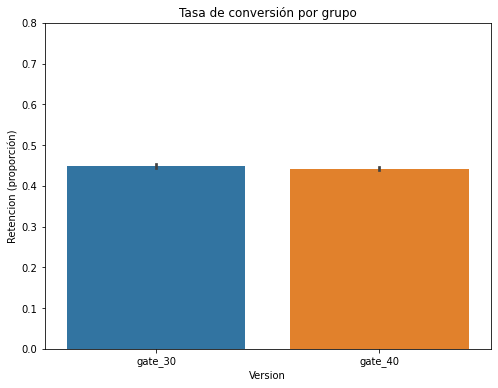

In [7]:
plt.figure(figsize=(8,6))

sns.barplot(x=ab_test['version'], 
            y=ab_test['retention_1'])

plt.ylim(0, 0.8)
plt.title('Tasa de conversión por grupo')
plt.xlabel('Version')
plt.ylabel('Retencion (proporción)');

In [8]:
# Tasa de conversión para ambos de entre 0.4 y 0.5 - Mayor en control - gate_30

In [9]:
control_res = ab_test[ab_test.version=='gate_30'].retention_1

tratamiento_res = ab_test[ab_test.version=='gate_40'].retention_1

n_con = control_res.count() 

n_trat = tratamiento_res.count()

observaciones = [n_con, n_trat]

conversiones = [control_res.sum(), tratamiento_res.sum()]

z_score, p_valor = proportions_ztest(conversiones, nobs=observaciones)

(control_a, tratamiento_a), (control_b, tratamiento_b) = proportion_confint(conversiones, 
                                                                            nobs=observaciones,
                                                                            alpha=0.05)

print(f'z-score: {z_score:.2f}')
print(f'p-valor: {p_valor:.3f}')
print(f'intervalo conf 95% para grupo control: [{control_a:.3f}, {control_b:.3f}]')
print(f'intervalo conf 95% para grupo tratamiento: [{tratamiento_a:.3f}, {tratamiento_b:.3f}]')

z-score: 1.78
p-valor: 0.074
intervalo conf 95% para grupo control: [0.444, 0.453]
intervalo conf 95% para grupo tratamiento: [0.438, 0.447]


In [10]:
# El p-valor está por encima de 0.05: No se descarta la hipótesis H0.
# Es decir, no hay diferencia significativa de la retención de 1 día entre gate_30 y gate_40

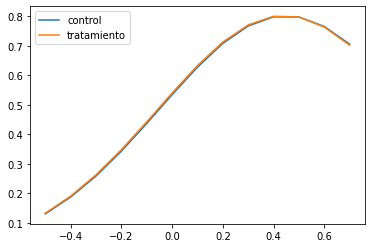

In [11]:
x=[i*.1 for i in range(-5, 8)]  

control=[norm.pdf(x, tasas_conversion.iloc[0][0], tasas_conversion.iloc[0][1]) for x in x] 

tratamiento=[norm.pdf(x, tasas_conversion.iloc[1][0], tasas_conversion.iloc[1][1]) for x in x] 

plt.plot(x, control)
plt.plot(x, tratamiento)
plt.legend(['control', 'tratamiento']);

### retention_7

In [12]:
tasas_conversion = ab_test.groupby('version')['retention_7']

std = lambda x: np.std(x, ddof=0)    # std

error_std = lambda x: stats.sem(x, ddof=0)   # error standard , (std/sqrt(n))

tasas_conversion = tasas_conversion.agg([np.mean, std, error_std])

tasas_conversion.columns = ['mean', 'std', 'std_error']

tasas_conversion.style.format('{:.3f}')

,mean,std,std_error
version,,,
gate_30,0.190,0.392,0.002
gate_40,0.182,0.386,0.002


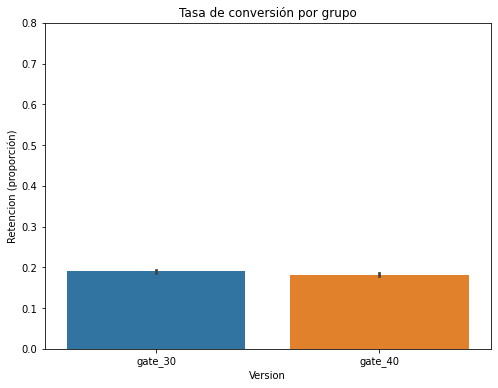

In [13]:
plt.figure(figsize=(8,6))

sns.barplot(x=ab_test['version'], 
            y=ab_test['retention_7'])

plt.ylim(0, 0.8)
plt.title('Tasa de conversión por grupo')
plt.xlabel('Version')
plt.ylabel('Retencion (proporción)');

In [14]:
# Tasa de conversión para ambos de entre 0.1 y 0.2 - Mayor en control - gate_30

In [15]:
control_res = ab_test[ab_test.version=='gate_30'].retention_7

tratamiento_res = ab_test[ab_test.version=='gate_40'].retention_7

n_con = control_res.count() 

n_trat = tratamiento_res.count()

observaciones = [n_con, n_trat]

conversiones = [control_res.sum(), tratamiento_res.sum()]

z_score, p_valor = proportions_ztest(conversiones, nobs=observaciones)

(control_a, tratamiento_a), (control_b, tratamiento_b) = proportion_confint(conversiones, 
                                                                            nobs=observaciones,
                                                                            alpha=0.05)

print(f'z-score: {z_score:.2f}')
print(f'p-valor: {p_valor:.3f}')
print(f'intervalo conf 95% para grupo control: [{control_a:.3f}, {control_b:.3f}]')
print(f'intervalo conf 95% para grupo tratamiento: [{tratamiento_a:.3f}, {tratamiento_b:.3f}]')

z-score: 3.16
p-valor: 0.002
intervalo conf 95% para grupo control: [0.187, 0.194]
intervalo conf 95% para grupo tratamiento: [0.178, 0.186]


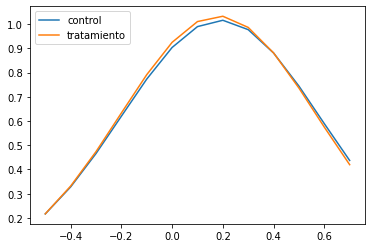

In [16]:
x=[i*.1 for i in range(-5, 8)]  

control=[norm.pdf(x, tasas_conversion.iloc[0][0], tasas_conversion.iloc[0][1]) for x in x] 

tratamiento=[norm.pdf(x, tasas_conversion.iloc[1][0], tasas_conversion.iloc[1][1]) for x in x] 

plt.plot(x, control)
plt.plot(x, tratamiento)
plt.legend(['control', 'tratamiento']);

In [17]:
# El p-valor está por debajo de 0.05: Se puede descartar la hipótesis H0.
# Es decir, hay diferencia significativa de la retención de 7 días entre gate_30 y gate_40

In [18]:
# muestreo


In [19]:
# testeo para retention_1


In [20]:
# testeo para retention_7


In [21]:
# conclusiones
# Explica detalladamente las conclusiones obtenidas de. tu testeo.